# Sample weighting

Misclassifying a fraudulous transaction is typically worse than misclassifying a non-fraudulous transaction. The cost of misclassifying a fraudulous transaction as non-fraudulous is equal to the amount of the transaction, while for non-fraudulous transactions there is only a fixed administrative cost involved.

To take these costs into account, we can **weight the training samples**. Samples with a higher weight will contribute more to the loss than samples with a lower weight.

## Train

We have already prepared the dataset as a pandas DataFrame that contains the misclassification costs (see column "**C_misclf**").

> **Note**: you can download the dataset [here](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud). Create a new folder called `data` in the directory of this notebook and move the downloaded csv file into that folder. Next, rename the csv file to `creditcard_fraud_dataset.csv`.

As you can see, the misclassification cost is equal to the transaction amount if the transaction was fraudulent (when column **Class** is 1), and equal to a fixed administrative cost if the transaction was non-fraudulent (column **Class** is 0).

In [1]:
from lib.creditcard_fraud_dataset import get_train_test_dfs

df_train, df_test = get_train_test_dfs()

df_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V26,V27,V28,Amount,Class,scaled_amount,scaled_time,C_FP,C_FN,C_misclf
102120,68060.0,-4.565781,2.891870,-1.505909,-0.609598,-0.684404,-0.417628,0.093167,1.017300,0.817597,...,0.481573,0.055996,0.500978,43.92,0,0.306295,-0.195397,2,43.92,2.0
147630,88766.0,-1.932119,0.463690,-1.171450,-0.549980,1.710455,-1.030608,1.084965,-0.275486,0.535062,...,0.275663,0.269275,0.667690,14.17,0,-0.109411,0.047862,2,14.17,2.0
243316,151883.0,-0.657832,0.753651,1.229142,-0.180336,-0.355564,-0.479811,-0.106428,0.409319,0.231304,...,-0.127742,0.096903,0.095731,0.80,0,-0.296234,0.789377,2,0.80,2.0
259221,159020.0,-1.207027,1.737476,-0.948094,-0.456881,0.686600,-0.665881,0.405398,0.575671,-0.585687,...,0.035332,-0.401375,0.004993,3.91,0,-0.252777,0.873225,2,3.91,2.0
144969,86526.0,1.974552,0.176499,-2.080724,1.149523,0.845438,-0.908770,0.815385,-0.414188,-0.140411,...,-0.512841,-0.045404,-0.048915,59.70,0,0.526794,0.021546,2,59.70,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,75618.0,1.173488,0.100792,0.490512,0.461596,-0.296377,-0.213165,-0.165254,0.119221,-0.114199,...,0.109235,-0.020922,0.003967,1.98,0,-0.279746,-0.106604,2,1.98,2.0
259178,159000.0,-0.775981,0.144023,-1.142399,-1.241113,1.940358,3.912076,-0.466107,1.360620,0.400697,...,-0.770941,0.066006,0.137056,89.23,0,0.939426,0.872990,2,89.23,2.0
131932,79795.0,-0.146609,0.992946,1.524591,0.485774,0.349308,-0.815198,1.076640,-0.395316,-0.491303,...,-0.398467,-0.121139,-0.196195,3.94,0,-0.252358,-0.057531,2,3.94,2.0
146867,87931.0,-2.948638,2.354849,-2.521201,-3.798905,1.866302,2.727695,-0.471769,2.217537,0.580199,...,0.426309,0.496912,0.335822,1.00,0,-0.293440,0.038053,2,1.00,2.0


To give more importance to fraudulent transactions, we assign the values of columns **C_misclf** to the `sample_weight` argument of our training function.

In [2]:
from lib.cs_train import train_clf


clf_weighted = train_clf(
    df_train,
    sample_weight=df_train['C_misclf']
)

clf_unweighted = train_clf(
    df_train,
    sample_weight=None
)

## Evaluate

In [3]:
from lib.cs_eval import evaluate_clf

eval_metrics_weighted = evaluate_clf(clf_weighted, df_test)
eval_metrics_unweighted = evaluate_clf(clf_unweighted, df_test)

In [4]:
import pandas as pd

df = pd.DataFrame([
    {
        'method': 'Weighted',
        **eval_metrics_weighted
    },
    {
        'method': 'Unweighted',
        **eval_metrics_unweighted
    }
])

In [5]:
df

,method,cost_precision,cost_recall,tp_amount,fp_amount,fn_amount,net
0,Weighted,0.954289,0.829544,25928.71,1242.0,5327.86,19358.85
1,Unweighted,0.997766,0.514306,16075.45,36.0,15181.12,858.33


Text(0.5, 1.0, 'Cost Recall')

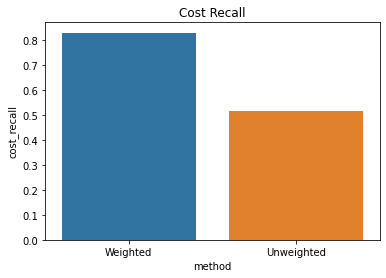

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=df, x='method', y='cost_recall')
plt.title('Cost Recall')

Text(0.5, 1.0, 'Cost Precision')

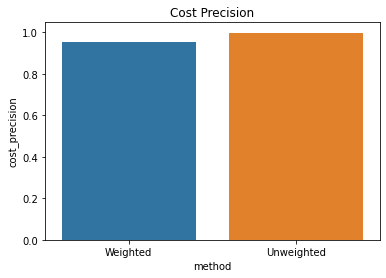

In [7]:
sns.barplot(data=df, x='method', y='cost_precision')
plt.title('Cost Precision')